In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import random
import copy
from tqdm.notebook import trange

In [2]:
# Representar e gerar tabuleiro
def geraTabulerio(tamanho):
  if tamanho < 4 : return [-1] # tabuleiro deve ter no minimo 2 casas
  tabuleiro = [] # gera o tabuleiro
  for i in range(tamanho): # para cada linha do tabuleiro
    tabuleiro.append([]) # adiciona uma linha vazia
    for j in range(tamanho): # para cada coluno dessa linha
      tabuleiro[i].append(0) # adiciona o valor 0
  for i in range(tamanho): # para cada linha to tabuleiro
    tabuleiro[i][0] = 1 # colocar o valor 1 na coluna 0
  return tabuleiro # retorna o tabuleiro

In [3]:
# Localizar Rainhas no tabuleiro
def locateQueens(estado):
  q = [] # vetor com as posições das rainhas
  for i in range(len(estado)): # verifica cada linha
    for j in range(len(estado)): # verifica cada coluna
      if estado[i][j] == 1 : q.append((i,j)) # se a casa tiver o
                                             # o valor 1, adiciona
                                             # a posição i,j no vetor
  return q # retorna o vertor com as posições das rainhas

In [4]:
# Verificar quanto ataques existem no tabulerios
def calAtaques(estado):
  at = 0 # inicia a contagem com 0 ataques
  atlinhas = 0 # inicia a verificação de ataques em linhas
  # ataques em linhas
  for i in estado: # para cada linha no tabuleiro
    if sum(i)>1: # verifica se a soma da linha é maior que 1
      atlinhas += sum(i)-1 # se for adiciona o valor da soma a atlinhas
  at += atlinhas # adiciona o valor de atlinhas a at

  # ataques em colunas
  atcolunas = 0 # inicia a verificação de ataques em colunas
  for c in range(len(estado)):
    nl = 0
    for l in range(len(estado)): nl += estado[l][c]
    if nl>1: atcolunas += nl - 1
  at += atcolunas # adiciona o valor de atcolunas a at

  # ataques nas diagonais
  pr = locateQueens(estado)
  d = 0
  for p, coords in enumerate(pr):
    i,j = coords
    # diagonal esquerda
    k,w = i+1, j-1
    while (w>=0 and k<len(estado)):
      if estado[k][w] == 1:
        d+=1
        break
      w-=1
      k+=1
    # diagonal direita
    l,c = i+1, j+1
    while(l< len(estado) and c<len(estado)):
      if estado[l][c] == 1:
        d+=1
        break
      l+=1
      c+=1
  at += d
  return at



In [5]:
def moveRainhaAleatoria(estado, casa):
  tam=len(estado)
  while True:
    i,j = random.choice(locateQueens(estado))
    k = (j+casa)%tam
    if estado[i][k] == 0:
      estado[i][k], estado[i][j] = estado[i][j], estado[i][k]
      break
  return estado

In [6]:
def moveRainhaMelhorPosicao(estado):
  tam=len(estado)

  for i,j in locateQueens(estado):

    new_j = j 
    min_attacks = calAtaques(estado)
    best_state = estado

    for possible_j in range(tam):
      if possible_j == j: continue

      tmp_estate = copy.deepcopy(estado)
      tmp_estate[i][j], tmp_estate[i][possible_j] = tmp_estate[i][possible_j], tmp_estate[i][j]
      attacks = calAtaques(tmp_estate)
      if(attacks < min_attacks):
        min_attacks = attacks
        new_j = possible_j
        best_state = tmp_estate

    estado = best_state      

  return estado

In [7]:
def hillClimbing(estado, passo, maxI):
  c=0
  n=len(estado[0])
  maxAtaques = math.factorial(n)/(2*math.factorial(n-2))
  ataques = []
  change = True
  while c <= maxI:
    change = False
    atq = calAtaques(estado)
    ataques.append(maxAtaques - atq)
    if atq == 0:
      return "Solução", estado, atq, ataques, passo, c
    suc = moveRainhaAleatoria(copy.deepcopy(estado), passo)
    if calAtaques(suc) <= atq:
      estado = suc
      change = True
    if not change: c += 1
  return "Falha", estado, atq, ataques, passo, c


In [8]:
def hillClimbing_s1(estado, passo, maxI):
  c=0
  n=len(estado[0])
  maxAtaques = math.factorial(n)/(2*math.factorial(n-2))
  ataques = []
  while c <= maxI:
    atq = calAtaques(estado)
    ataques.append(maxAtaques - atq)
    if atq == 0:
      return "Solução", estado, atq, ataques, passo, c

    suc = moveRainhaMelhorPosicao(copy.deepcopy(estado))

    if suc == estado:
      suc = moveRainhaAleatoria(estado, passo)

    estado = suc

    # como mudaremos a cada iteracao, c tambem muda a cada iteracao
    c += 1
  return "Falha", estado, atq, ataques, passo, c


In [9]:
def tabuleiro_aleatorio(tamanho):
    tabuleiro = geraTabulerio(tamanho)
    passo = 1 # poderia ser um valor aleatório
    for _ in range(tamanho):
        tabuleiro = moveRainhaAleatoria(copy.deepcopy(tabuleiro), passo) 
    return tabuleiro 

In [17]:
def hillClimbing_s2(tamanho_tabuleiro):
    tabuleiro = tabuleiro_aleatorio(tamanho_tabuleiro)
    passo = random.randint(1, tamanho_tabuleiro-1)
    result = hillClimbing(tabuleiro, passo, 1000)
    return result

# BENCHMARKING

In [13]:
BENCHMARKS_FILE="benchmarks.csv"

In [34]:
def create_results_df():
    return pd.DataFrame(columns=("method", "iterations", "status", "board_size", "step"))

In [ ]:
iterations = 1000
results = create_results_df() 

In [15]:
for i in trange(iterations):
    hc_result = hillClimbing(geraTabulerio(9), 1, 1000)
    status = hc_result[0]
    total_movements = hc_result[-1]
    steps = hc_result[-2]
    results.loc[len(results)] = {"method":"standard", "iterations":total_movements, "status":status, "board_size":9, "step":steps}

  0%|          | 0/1000 [00:00<?, ?it/s]

In [16]:
for i in trange(iterations):
    hc2_result = hillClimbing_s1(geraTabulerio(9), 1, 1000)
    status = hc2_result[0]
    total_movements = hc2_result[-1]
    steps = hc2_result[-2]
    results.loc[len(results)] = {"method":"move best position - random", "iterations":total_movements, "status":status, "board_size":9, "step":steps}

  0%|          | 0/1000 [00:00<?, ?it/s]

In [18]:
for i in trange(iterations):
    hc3_result = hillClimbing_s2(9)
    status = hc3_result[0]
    total_movements = hc3_result[-1]
    steps = hc3_result[-2]
    results.loc[len(results)] = {"method":"random board and step", "iterations":total_movements, "status":status, "board_size":9, "step":steps}

  0%|          | 0/1000 [00:00<?, ?it/s]

In [19]:
results.to_csv(BENCHMARKS_FILE, index=False)

In [38]:
clean_df = results.drop_duplicates()

methods = ["standard", "move best position - random", "random board and step"]
final_df = create_results_df() 

for method in methods:
    method_rows = clean_df.loc[clean_df["method"] == method]
    method_rows_iterations = method_rows["iterations"]
    target_rows = method_rows.loc[method_rows["iterations"] == method_rows_iterations.min()]

    final_df = pd.concat([final_df, target_rows])

final_df.to_csv("best_results.csv", index=False)
final_df


,method,iterations,status,board_size,step
120,standard,88,Solução,9,1
1219,move best position - random,6,Solução,9,1
2071,random board and step,24,Solução,9,6


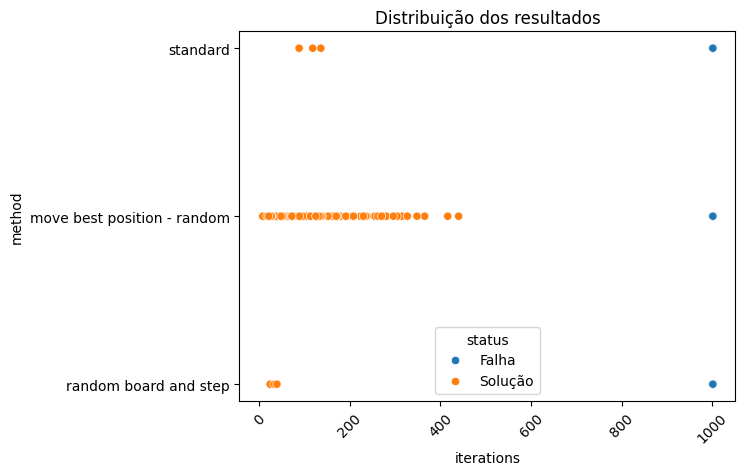

In [51]:
sns.scatterplot(data=results, y="method", x="iterations", hue="status")
plt.title("Distribuição dos resultados")
plt.xticks(rotation=45)
plt.savefig("./assets/distribuicao-resultados.png", bbox_inches="tight")
plt.show()

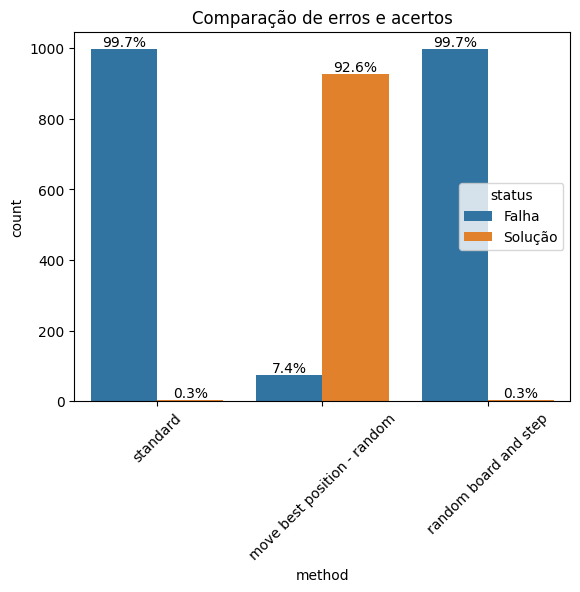

In [59]:
plot = sns.countplot(data=results, x="method", hue="status")
for c in plot.containers:
    plot.bar_label(c, fmt=lambda x: f'{(x/iterations)*100:0.1f}%')
plt.title("Comparação de erros e acertos")
plt.xticks(rotation=45)
plt.savefig("./assets/comparação-total-erros-acertos.png", bbox_inches="tight")
plt.show()